# Assignment 7
### Do any five.

## 1. 

- What is the expected value of a single die roll? 
    - Sum of outcomes times probability (1/6) 
        - (1+2+3+4+5+6)/6 = 3.5

- What is the expected value of rolling two dice and adding the results together?
    - 3.5 + 3.5 = 7

- What is the expected winnings of any gamble in European roulette?
    - probability of winning - probability of losing
        - 18/37 - 19/37 = -1/37 = -0.0270. This means you are expected to lose 2.7 cents for every dollar you gamle in european roulette. 

- Imagine you roll a die, and you record the value you get. But, if you roll a six, you roll again, and add that value. What is the expected value?
    - the expected value of a roll is 3.5. 
    - there is a 1/6 chance of rolling a 6. If you roll a six then the mean is also 3.5.
        - X = 3.5 + 3.6/6 = 4.083

- Imagine that the process described in the last question continues until you fail to roll a six. What is the expected value of the process? (This can be tricky, you can simulate it to get an answer if you prefer. Hint: The answer is 4.2.)
    - probability of rolling [1,2,3,4,5] on a 6-sided die is 5/6. The mean is (1+2+3+4+5)/5 = 3.
    - probability of rolling 6 on a 6-sided die is 1/6. If you roll a six then then you roll again. So, the mean is 6 + X. 
        - X = 5/6 (3) + 1/6 (6+X) = 4.2
            - The expected value is 4.2.

## 2. 
- Compute the expected value for a uniform random variable.
    - A random uniform random distribution represents a distribution in which each outcome is equally likely to occur. 
    - Let X be the possible outcomes $x_1, x_2, ... x_n$, then 
        - E[X] = ($x_1, x_2, ... x_n$)/n

- Show that $\mathbb{E}[a+bX] = a + b\mathbb{E}[X]$
    - Done on paper.

- Show, by example, that $v(\mathbb{E}[X]) \neq \mathbb{E}[v(X)]$, if $v(x) \neq a+bx$. For example, try $v(y) = y^2$ or $v(y)=\sqrt{y}$ with a Bernoulli or uniform or normally distributed random variable. This can be an important thing to remember: The expectation of a transformed random variable is not the transformation of the expected value.
    - Done on paper.

## 5. 

Suppose $X$ has an expectation $\mathbb{E}[X]<\infty$ and variance $\mathbb{V}[X]<\infty$; this isn't always true, but is *usually* true
- Consider making a new variable, $\varepsilon = X - \mathbb{E}[X]$
- What's the expectation of $\varepsilon$?
- What's the variance of $\varepsilon$?
- So we can write any random variable in the form $X = \mathbb{E}[X] + \varepsilon, $ where $\mathbb{E}[\varepsilon]=0$ and $\mathbb{V}[\varepsilon] = \sigma_X^2$
- If that's true, show that we can also write any random variable in the form $X = \mathbb{E}[X] + \sigma_X \varepsilon$, where $\mathbb{E}[\varepsilon]=0$ and $\mathbb{V}[\varepsilon]=1$
- Now replace $\mathbb{E}[X]$ with $x\beta$, and the stage is set for regression models
    - done on paper

## 6.
- Use the Taylor series expansions 
$$
F(x+h) = F(x) + hf(x) + \frac{h^2}{2}f'(x) + O(h^3)
$$ 
and 
$$
F(x-h) = F(x) - h f(x) + \frac{h^2}{2} f'(x)+ O(h^3)
$$
to show that
$$
\mathbb{E}[\hat{f}_{X,h}(x)] = \frac{F(x+h)-F(x-h)}{2h} = f(x) + O(h^2),
$$
so the **bias** of the KDE is $O(h^2)$, unlike the ECDF, for which $\mathbb{E}[\hat{F}(x)] = F(x)$.

## 8.
- Open the METABRIC data. Make a histogram of 'Ratio Therapy'.
- Let treatment, $T$ be distributed binomial with parameter $p$. Then the contribution to the likelihood for each patient $i$, with $y_i = 0$ for no radiation therapy and $y_i=1$ for radiation therapy, is 
$$
p^{y_i}(1-p)^{1-y_i}
$$
- Write out the likelihood.
- Maximize the likelihood with respect to $p$. What is the MLE, $\hat{p}$?
- Bootstrap the sampling density/distribution of $\hat{p}$.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("/Users/hmillspaugh/DS5030_Uncert/data/metabric.csv")


In [5]:
df.columns

Index(['Age at Diagnosis', 'Type of Breast Surgery', 'Cancer Type',
       'Chemotherapy', 'Hormone Therapy', 'Lymph nodes examined positive',
       'Mutation Count', 'Nottingham prognostic index',
       'Overall Survival (Months)', 'Overall Survival Status', 'Radio Therapy',
       'TMB (nonsynonymous)', 'Tumor Size', 'Tumor Stage'],
      dtype='object')

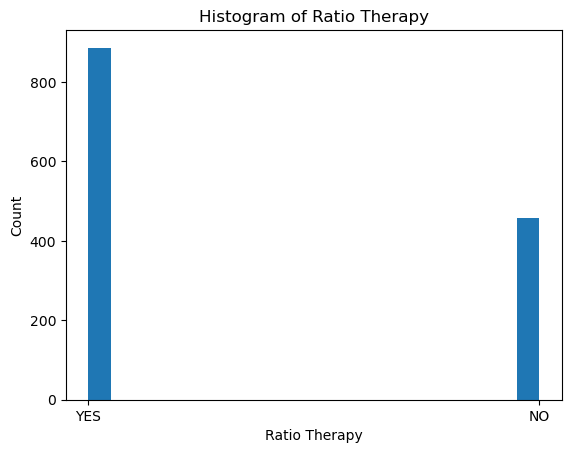

In [6]:
plt.hist(df["Radio Therapy"], bins=20)
plt.xlabel("Ratio Therapy")
plt.ylabel("Count")
plt.title("Histogram of Ratio Therapy")
plt.show()

- Wrote Likelihood and MLE answers on attached paper

In [12]:
y = df["Radio Therapy"].values  # 0/1 variable
n = len(y)
B = 5000  # number of bootstrap samples

df["Radio Therapy"] = df["Radio Therapy"].map({"YES":1, "NO":0})

boot_p = []

for _ in range(B):
    sample = np.random.choice(y, size=n, replace=True)
    boot_p.append(sample.mean())

boot_p = np.array(boot_p)

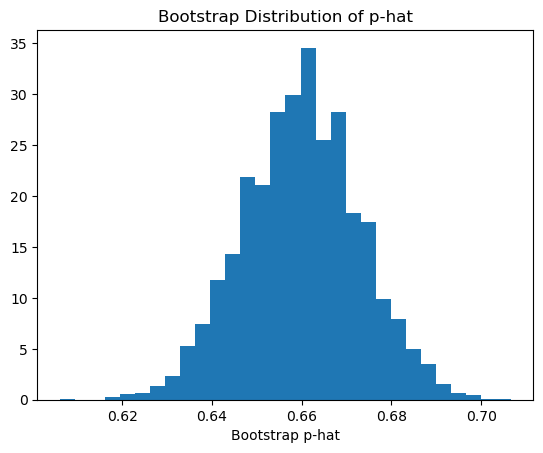

In [13]:
plt.hist(boot_p, bins=30, density=True)
plt.xlabel("Bootstrap p-hat")
plt.title("Bootstrap Distribution of p-hat")
plt.show()

- Shows that about 2/3 of patients recieved radiation therapy